## The docker is a nice tool for us to create virtual environment, here we only learned how to use the bash version, in docker they called it docker-engine

### The structure of docker

The structure of docker is like that below:

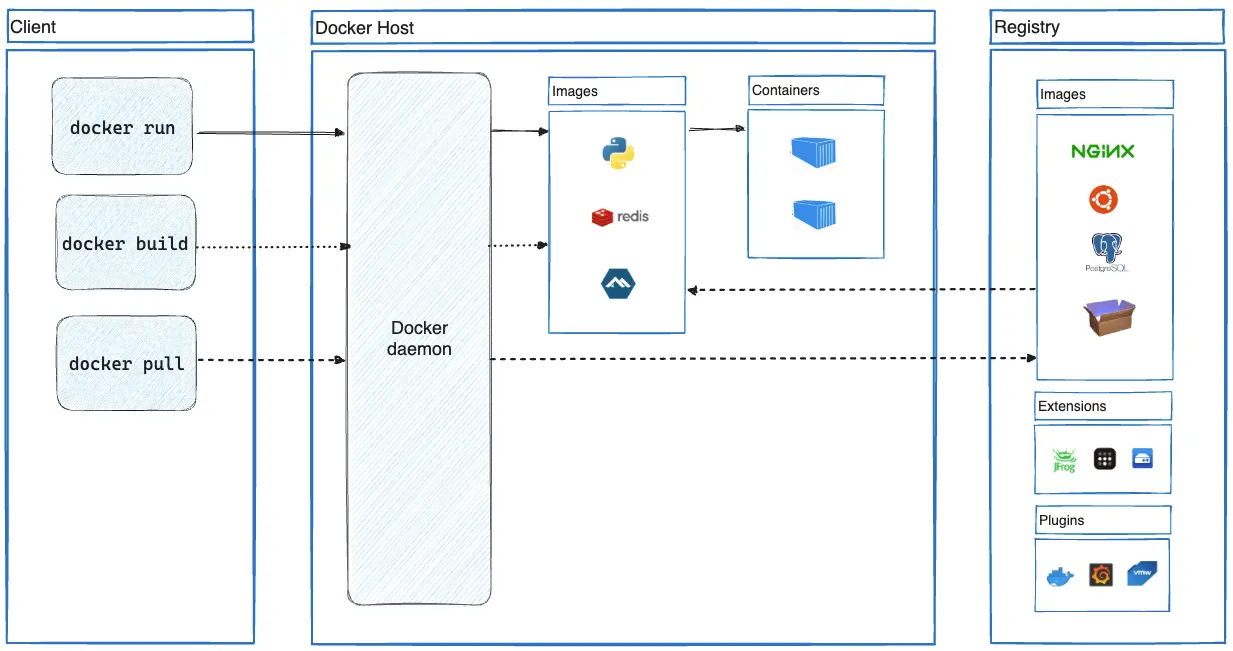

### Install docker

#### Lot's of the old system will automatically install grampa version docker, we need to uninstall all of them first, also make sure do not have any vgw, because docker can't works well with it

Use this command in bash which is written by the docker official to uninstall all these pakages

```bash
for pkg in docker.io docker-doc docker-compose podman-docker containerd runc; do sudo apt-get remove $pkg; done

#### In the official website we can choose apt install 

First, set up docker repository

``` bash
# Add Docker's official GPG key:
sudo apt-get update
sudo apt-get install ca-certificates curl
sudo install -m 0755 -d /etc/apt/keyrings
sudo curl -fsSL https://download.docker.com/linux/debian/gpg -o /etc/apt/keyrings/docker.asc
sudo chmod a+r /etc/apt/keyrings/docker.asc

# Add the repository to Apt sources:
echo \
  "deb [arch=$(dpkg --print-architecture) signed-by=/etc/apt/keyrings/docker.asc] https://download.docker.com/linux/debian \
  $(. /etc/os-release && echo "$VERSION_CODENAME") stable" | \
  sudo tee /etc/apt/sources.list.d/docker.list > /dev/null
sudo apt-get update

Then, install it

``` bash
sudo apt-get install docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin

We can use 

```bash
sudo systemctl status docker
```

to check the status of the docker service

Be aware that the `sudo systemctl start` is starting the service but do not make it automatically running after booting, but the `sudo systemctl enable` will makes the service can running while booting. However always first set the service ruuning while booting and start the service.

The `sudo systemctl stop` and `sudo systemctl disable` are as the same as the command upward

`sudo docker run hello-world` is for testing if the docker works perfectly, if it's works fine, will be like that below

```bash
prp@prp:~ $ sudo docker run hello-world
Unable to find image 'hello-world:latest' locally
latest: Pulling from library/hello-world
198f93fd5094: Pull complete
Digest: sha256:54e66cc1dd1fcb1c3c58bd8017914dbed8701e2d8c74d9262e26bd9cc1642d31
Status: Downloaded newer image for hello-world:latest

Hello from Docker!
This message shows that your installation appears to be working correctly.

To generate this message, Docker took the following steps:
 1. The Docker client contacted the Docker daemon.
 2. The Docker daemon pulled the "hello-world" image from the Docker Hub.
    (arm64v8)
 3. The Docker daemon created a new container from that image which runs the
    executable that produces the output you are currently reading.
 4. The Docker daemon streamed that output to the Docker client, which sent it
    to your terminal.

To try something more ambitious, you can run an Ubuntu container with:
 $ docker run -it ubuntu bash

Share images, automate workflows, and more with a free Docker ID:
 https://hub.docker.com/

For more examples and ideas, visit:
 https://docs.docker.com/get-started/
```

**These procedures are only for the Debian system, before instalation check the `https://docs.docker.com/get-started/`**

#### The docker has these several commands:

`sudo docker run -d -p <hoster port>:<docker port> <docker name>` will run a docker from image named 'docker name' in the docker, if the docker do not exist, will trying to dowload it.

The `-d` means running in the background, which makes the docker don't makes such lot of output to the terminal

The `-p` means map port `<docker port>` of the docker to the `<hoster port>` of real machine(host machine)

The `<docker name>` format: `[REGISTRY_HOST/]NAMESPACE/REPOSITORY[:TAG]`

eg:   docker/welcome-to-docker:latest

`REGISTRY_HOST/` (optional): e.g., docker.io (default), gcr.io, ghcr.io.
If you don’t specify, Docker assumes docker.io (Docker Hub).

`NAMESPACE/`: like a user or organization (here: docker).
If omitted, Docker assumes library/ (official images like ubuntu, nginx).

`REPOSITORY`: the actual project name (here: welcome-to-docker).

`:TAG (optional)`: version/variant (default is latest).
Example: nginx:1.27 or python:3.12-slim.

This bash is for `running the container`

In [5]:
! sudo docker run -d -p 8080:80 docker/welcome-to-docker

Unable to find image 'docker/welcome-to-docker:latest' locally
latest: Pulling from docker/welcome-to-docker

4226ea69: Already exists 
3f997c88: Pulling fs layer 
92514b6f: Pulling fs layer 
249bdabb: Pulling fs layer 
450e0584: Pulling fs layer 
f8bf5f2b: Pulling fs layer 
99686bc8: Pulling fs layer 
Digest: sha256:c4d56c24da4f009ecf8352146b43497fe78953edb4c679b841732beb97e588b0
Status: Downloaded newer image for docker/welcome-to-docker:latest
ee60874919e789adbba41ad26b22762baac6d70bf08068f26cfa799f5fb0503c


To `find which container` is running

In [6]:
! sudo docker ps

CONTAINER ID   IMAGE                      COMMAND                  CREATED         STATUS         PORTS                                     NAMES
ee60874919e7   docker/welcome-to-docker   "/docker-entrypoint.…"   7 seconds ago   Up 6 seconds   0.0.0.0:8080->80/tcp, [::]:8080->80/tcp   ecstatic_antonelli


To `find all containers` include the stopped one

In [8]:
! sudo docker ps -a

CONTAINER ID   IMAGE                              COMMAND                  CREATED          STATUS                      PORTS                                     NAMES
ee60874919e7   docker/welcome-to-docker           "/docker-entrypoint.…"   15 minutes ago   Up 15 minutes               0.0.0.0:8080->80/tcp, [::]:8080->80/tcp   ecstatic_antonelli
19b5cd72309f   getting-started-todo-app-backend   "docker-entrypoint.s…"   11 hours ago     Exited (1) 28 minutes ago                                             getting-started-todo-app-backend-1
88d2cc4945a8   traefik:v3.4                       "/entrypoint.sh --pr…"   11 hours ago     Exited (0) 28 minutes ago                                             getting-started-todo-app-proxy-1
e82da823412f   mysql:9.3                          "docker-entrypoint.s…"   11 hours ago     Exited (0) 28 minutes ago                                             getting-started-todo-app-mysql-1
bcb158d3584f   phpmyadmin                         "/docker-entry

The docker we use is an web server, which we can type `http://localhost:8080` in host's browser and to see what's happend 

We can see the server told us the docker running successfully

To stop a container, we can use `sudo docker stop <docker name>/<docker id>`

In [9]:
! sudo docker stop ee60874919e7

ee60874919e7


In [ ]:
! sudo docker stop ee

In [ ]:
! sudo docker stop ecstatic_antonelli

In [10]:
! sudo docker ps

CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES


**Hints**

1. The docker id don't need to be as the same as the real one, can just use the beginning of it, if it's unique one.

2. But if it using names, need to specify which one it is.

### Now we take a look at images

Images are the files we need to use in a container, once it been created, it can't been modify, so mostly the docker official or the team of you will provide basic docker and you can use it to combine or add new layer on it

There are two priciples of the image:

1. The images are immutable, Once an image is created, it can't be modified. You can only make a new image or add changes on top of it.

2. Container images are composed of layers. Each layer represents a set of file system changes that add, remove, or modify files.

#### The images are stored in Docker Hub, a platform which like Github

There are 3 kinds of docker in the Docker Hub:

1. Dokcer Official Images: Most secure one, maintained by docker official.

2. Dokcer valid publishers: High quality dockers.

3. Docker sponsered open source: Open source project.

To `search an image` in Docker Hub

In [12]:
! sudo docker search docker/welcome-to-docker

NAME                                            DESCRIPTION                                     STARS     OFFICIAL
docker/welcome-to-docker                        Docker image for new users getting started w…   63        
docker/dockerfile                               Official Dockerfile frontend images that ena…   121       
docker/dockerfile-copy                          (deprecated)                                    1         
docker/docker-model-backend-llamacpp                                                            0         
docker/docker-bench-security                    (deprecated) Docker Bench checks for dozens …   65        
docker/desktop-docker-debug-service                                                             0         
docker/dockerfile-upstream                      Staging version of docker/dockerfile            12        
docker/docker-desktop-ai-desktop-module                                                         0         
docker/docker-mcp-cli-desktop

The informations are alot, we can break it into several parts:

1. `NAME` → The image name on Docker Hub (e.g., docker/whalesay).

2. `DESCRIPTION` → A short text about what the image is for.

3. `STARS` → Like GitHub stars, these are Docker Hub “likes” from the community (how popular it is).

4. `OFFICIAL` → [OK] means it’s an official image, maintained by Docker or a trusted org.

To `dowload or pull the image` like github

In [13]:
! sudo docker pull docker/welcome-to-docker

Using default tag: latest
latest: Pulling from docker/welcome-to-docker
Digest: sha256:c4d56c24da4f009ecf8352146b43497fe78953edb4c679b841732beb97e588b0
Status: Image is up to date for docker/welcome-to-docker:latest
docker.io/docker/welcome-to-docker:latest


To `list every image` in the host

In [14]:
! sudo docker image ls

REPOSITORY                         TAG       IMAGE ID       CREATED        SIZE
getting-started-todo-app-backend   latest    00424e7957f3   21 hours ago   1.27GB
getting-started-todo-app-client    latest    3282a40b4158   21 hours ago   1.25GB
hello-world                        latest    ca9905c726f0   7 weeks ago    5.2kB
docker/welcome-to-docker           latest    05028304d2c2   2 months ago   14.4MB
traefik                            v3.4      a565cefb9209   2 months ago   215MB
mysql                              9.3       d182d776b088   5 months ago   877MB
phpmyadmin                         latest    856b232928b0   7 months ago   583MB


To `list layers of one image`

In [15]:
! sudo docker image history docker/welcome-to-docker

IMAGE          CREATED        CREATED BY                                      SIZE      COMMENT
05028304d2c2   2 months ago   COPY /app/build /usr/share/nginx/html # buil…   1.6MB     buildkit.dockerfile.v0
<missing>      3 months ago   CMD ["nginx" "-g" "daemon off;"]                0B        buildkit.dockerfile.v0
<missing>      3 months ago   STOPSIGNAL SIGQUIT                              0B        buildkit.dockerfile.v0
<missing>      3 months ago   EXPOSE map[80/tcp:{}]                           0B        buildkit.dockerfile.v0
<missing>      3 months ago   ENTRYPOINT ["/docker-entrypoint.sh"]            0B        buildkit.dockerfile.v0
<missing>      3 months ago   COPY 30-tune-worker-processes.sh /docker-ent…   4.62kB    buildkit.dockerfile.v0
<missing>      3 months ago   COPY 20-envsubst-on-templates.sh /docker-ent…   3.02kB    buildkit.dockerfile.v0
<missing>      3 months ago   COPY 15-local-resolvers.envsh /docker-entryp…   389B      buildkit.dockerfile.v0
<missing>      3

For the `sudo docker image history docker/welcome-to-docker`, The parameter `Created by` tells this layer was created by which command

**To remove a container/image**

First we need to stop the container if we want remove it, and remove it

`stop a container`: sudo docker stop <container id/ name>

`Remove a container` sudo docker rm <container id/ name>

In [22]:
! sudo docker stop 19
! sudo docker rm  19

19
19


Secondly, we can remove the image of this container

In [23]:
! sudo docker image ls

REPOSITORY                         TAG       IMAGE ID       CREATED        SIZE
getting-started-todo-app-backend   latest    00424e7957f3   21 hours ago   1.27GB
getting-started-todo-app-client    latest    3282a40b4158   21 hours ago   1.25GB
hello-world                        latest    ca9905c726f0   7 weeks ago    5.2kB
docker/welcome-to-docker           latest    05028304d2c2   2 months ago   14.4MB
traefik                            v3.4      a565cefb9209   2 months ago   215MB
mysql                              9.3       d182d776b088   5 months ago   877MB
phpmyadmin                         latest    856b232928b0   7 months ago   583MB


Sometimes we don't want stop the container and remove the image, so we use `-f` to do a force remove, but recommand to stop container first

In [31]:
! sudo docker rmi -f 85

Untagged: phpmyadmin:latest
Untagged: phpmyadmin@sha256:23d39937547eebf3cb0d81b9b655e924afb82b5cdd573c9dcd9064b5c0610d4b
Deleted: sha256:856b232928b029899775d6f6ef84697ffbdf21eaa72d8b32d69d845bebe7641f


### Now go through the Docker Registry

The docker registry is like github repostitories, but not the same

`Images` are the file of containers. 

`containers` need images to running.

`repository` will zip several images, so reposiroty is a list of images.

`registry` is list of repositories, the registry has a lot of repositories.

#### sign in and create an account, then use docker hub like the github

Here we will learn how to build an image, but need to know the image need Dockerfile to create, which will learned later

In [32]:
! git clone https://github.com/dockersamples/helloworld-demo-node

Cloning into 'helloworld-demo-node'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 64 (delta 16), reused 8 (delta 8), pack-reused 40 (from 2)
Receiving objects: 100% (64/64), 19.91 KiB | 1.05 MiB/s, done.
Resolving deltas: 100% (19/19), done.


We already has the required files, now change to that file and build it